<a href="https://colab.research.google.com/github/nptikiran/Linkedin_Google_ProfileScraper/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anand Fabric 
Assingment

Please research about Algorithmic Trading, Stock price Prediction Algorithms and Please write a 2 Pages Research article on how you would use a stock price prediction algorithm to give the best results. Which Factors you would include, what areas you would explore, How  would you ascertain a stock price.

In [6]:
# import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
# get the stock Quote
df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.012764
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.183548
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.096771


In [8]:
#get the number of rows and column
df.shape

(2003, 6)

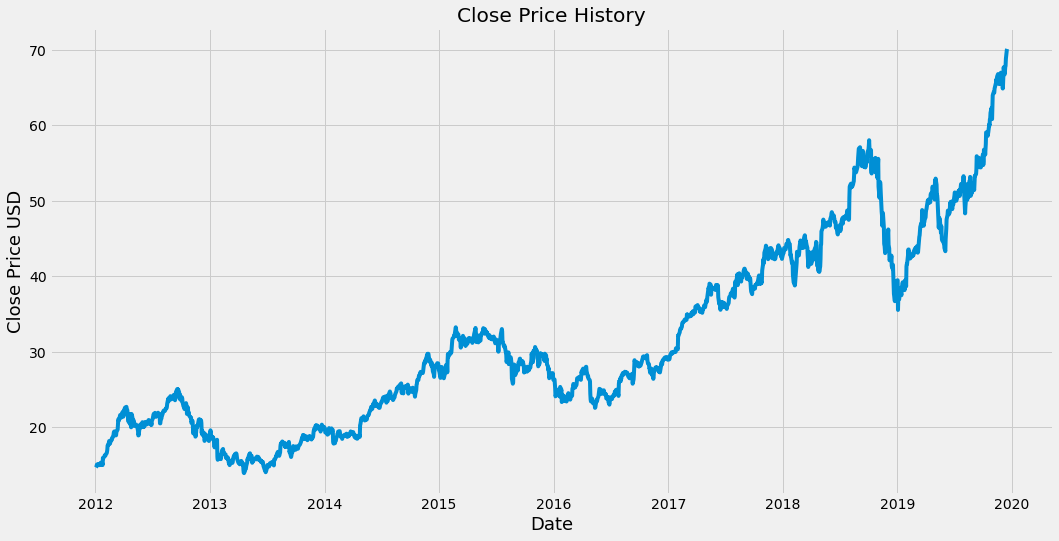

In [9]:
#visualise closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18);

In [23]:
#create a dataframe with only close column
data = df.filter(['Close'])
# convert the dataframe to a array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

1603

In [11]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [12]:
# create the training data set
# create the scaled train data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [24]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array (x_train), np.array(y_train)

In [25]:
# reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1943, 60, 1)

In [26]:
# build LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [28]:
model.fit(x_train, y_train, batch_size=1)

1943/1943 [==============================] - 45s 22ms/step - loss: 0.0048


In [30]:
# create a testing datasets
# create a new array contaning scaled values from index 1943 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#create datset x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [31]:
scaled_data[tr_data_len-60:,:]

array([], shape=(0, 1), dtype=float64)

In [32]:
y_test

array([[46.74750137],
       [46.57749939],
       [46.90750122],
       [46.79000092],
       [47.09000015],
       [47.03749847],
       [47.14500046],
       [46.97499847],
       [46.875     ],
       [46.71749878],
       [47.56000137],
       [47.95750046],
       [48.32749939],
       [48.49499893],
       [48.36500168],
       [47.92499924],
       [47.80749893],
       [48.06999969],
       [47.67499924],
       [47.70000076],
       [47.20999908],
       [47.18500137],
       [46.42250061],
       [46.625     ],
       [46.36500168],
       [46.22999954],
       [45.54249954],
       [46.10749817],
       [46.04000092],
       [46.375     ],
       [46.27750015],
       [46.79499817],
       [45.97999954],
       [46.34999847],
       [46.99250031],
       [47.64500046],
       [47.58750153],
       [46.97000122],
       [47.75749969],
       [47.83250046],
       [47.72750092],
       [47.86249924],
       [47.59999847],
       [47.97000122],
       [47.86000061],
       [47

In [33]:
#convert the data to a numpy array
x_test = np.array(x_test)
x_test

array([[0.51322235, 0.51958863, 0.53294452, ..., 0.58926183, 0.58164901,
        0.58939538],
       [0.51958863, 0.53294452, 0.54839284, ..., 0.58164901, 0.58939538,
        0.5840976 ],
       [0.53294452, 0.54839284, 0.54581069, ..., 0.58939538, 0.5840976 ,
        0.58107023],
       ...,
       [0.7353308 , 0.72095091, 0.72535838, ..., 0.94688811, 0.95708301,
        0.96015487],
       [0.72095091, 0.72535838, 0.7207283 , ..., 0.95708301, 0.96015487,
        0.97658263],
       [0.72535838, 0.7207283 , 0.7356424 , ..., 0.96015487, 0.97658263,
        0.99755134]])

In [34]:
#reshape the data need to three dimentional for LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [35]:
 prediction = model.predict(x_test)
 prediction = scaler.inverse_transform(prediction)

In [36]:
# get root mean square (RMSE)
rmse = np.sqrt(np.mean(prediction - y_test)**2)
rmse

0.42369985580444336

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<Figure size 1152x576 with 0 Axes>

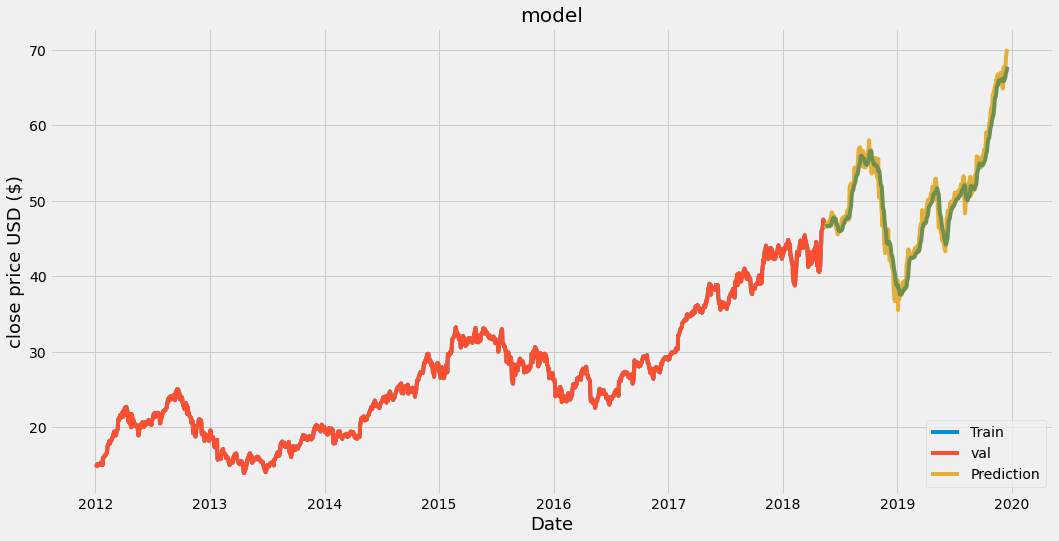

In [47]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['prediction'] = prediction

#visualise the model
plt.figure(figsize=(16,8))
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','val','Prediction'],loc = 'lower right')
plt.show()

In [42]:
#Show the valid and predicted prices
valid

,Close,prediction
Date,,
2018-05-17,46.747501,46.607372
2018-05-18,46.577499,46.658108
2018-05-21,46.907501,46.641087
2018-05-22,46.790001,46.631088
2018-05-23,47.090000,46.611141
...,...,...
2019-12-11,67.692497,66.384499
2019-12-12,67.864998,66.628296
2019-12-13,68.787498,66.889137


In [54]:
# get the quote
app_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = app_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array 
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price =model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[68.274536]]


In [55]:
#Get the quote
app_quote2 = web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')
print(app_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
